<a href="https://colab.research.google.com/github/rodrigorochag/cnn_classifier_keras/blob/main/cnn_ds_animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ## Using keras to read dataset

In [2]:
kaggle_info = {
    "username": "user_kaggle",
    "key": "api_key"
}

In [3]:
# Install the Kaggle library
!pip install -q kaggle

# Set Kaggle credentials
import json
import os

# Replace the following with your Kaggle username and API key


# Save Kaggle credentials to a JSON file
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_info, file)

# Change the permissions of the file
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d likhon148/animal-data
# Unzip the dataset
#!mkdir /content/gpiosenka/sports-classification
!unzip -q animal-data.zip -d animal-data

# List the contents of the directory
!ls /content/animal-data


Dataset URL: https://www.kaggle.com/datasets/likhon148/animal-data
License(s): MIT
 72% 26.0M/36.3M [00:00<00:00, 141MB/s] 
100% 36.3M/36.3M [00:00<00:00, 152MB/s]
animal_data


In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [7]:
import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#archive = tf.keras.utils.get_file(extract=False)
data_dir = pathlib.Path("/content/animal-data/animal_data").with_suffix('')#

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1646


In [14]:
type(bear[0])

pathlib.PosixPath

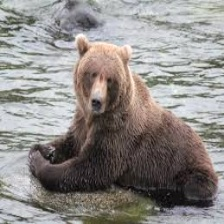

In [10]:
bear = list(data_dir.glob('Bear/*'))
PIL.Image.open(str(bear[0]))

In [15]:
batch_size = 32
img_height = 224
img_width = 224

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1944 files belonging to 15 classes.
Using 388 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


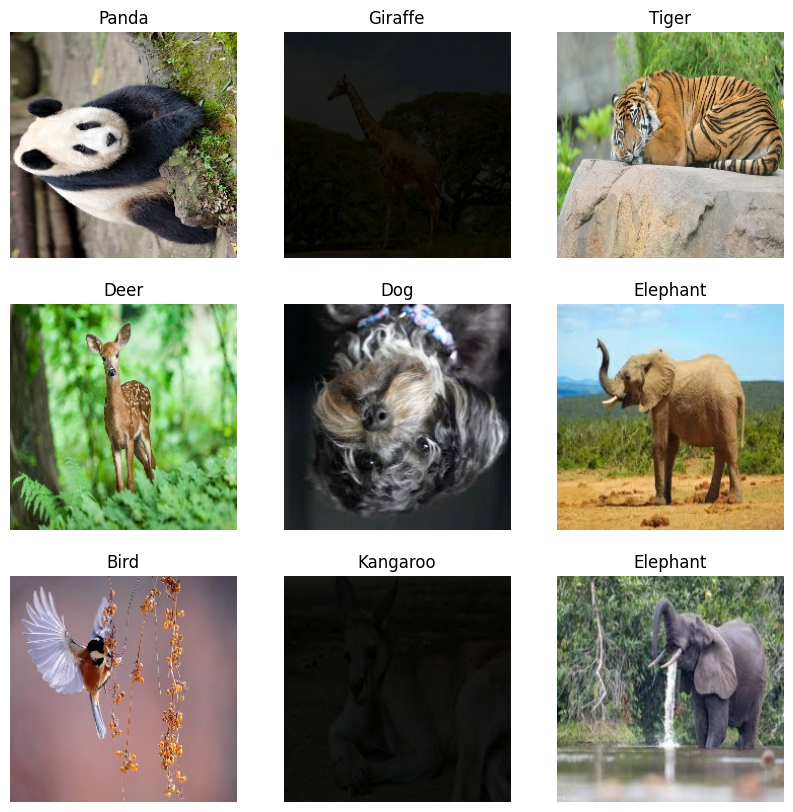

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [24]:
print(type(image_batch))
print(type(labels_batch))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [25]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [26]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [27]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
num_classes = 15

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [29]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [30]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
49/49 [==============================] - 107s 2s/step - loss: 2.5788 - accuracy: 0.1742 - val_loss: 2.3481 - val_accuracy: 0.2448
Epoch 2/3
49/49 [==============================] - 99s 2s/step - loss: 2.0266 - accuracy: 0.3805 - val_loss: 2.0347 - val_accuracy: 0.3428
Epoch 3/3
49/49 [==============================] - 97s 2s/step - loss: 1.4659 - accuracy: 0.5585 - val_loss: 1.9125 - val_accuracy: 0.4485
